In [26]:
## 1. Import modules
import pandas as pd
import openai
from bs4 import BeautifulSoup

In [19]:
## 2. Load data
lessons = pd.read_csv("new_lessons.csv",index_col=[0])

In [16]:
lessons

,index,_id,likes,views,subjectId,courseId,termId,title,content,updatedAt,createdAt,videoUrls,thumbnailUrl,__v,creatorId
0,0,6012bdcecfe09249249f7e9c,[],62.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>back to: <a class=""on"">agricultural science...",2023-03-15 07:50:55.190,2021-08-02 12:52:44.000,"[{'_id': ObjectId('61599bbe0d83c53834563589'),...",https://afrilearn-media.s3.eu-west-3.amazonaws...,3.0,NaN
1,1,6012bdcecfe09249249f7e9e,[],23.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach),welcome to class.\r\n\r\ninsects are small cre...,2022-10-02 13:46:35.116,2021-06-22 14:30:54.892,[],NaN,5.0,5fd66fb678385d3c8098f880
2,2,6012bdcecfe09249249f7ea0,[],5.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect,welcome to class.\r\n\r\ninsect are small crea...,2022-10-02 13:47:01.266,2021-08-13 11:33:27.464,[],NaN,2.0,5fd66fb678385d3c8098f880
3,3,6012bdcecfe09249249f7ea2,[],3.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects,welcome to class.\r\n\r\nharmful insects are t...,2023-03-15 08:15:23.968,2021-08-13 11:30:47.016,[],NaN,2.0,5fd66fb678385d3c8098f880
4,4,6012bdcecfe09249249f7ea4,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),welcome to class.\r\n\r\nthe earthworm is a lo...,NaN,NaN,[],NaN,1.0,5fd66fb678385d3c8098f880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,3726,62a08b540b99530016d3474e,[],1.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Loops in Javascript,"<p><span style=""background-color: transparent;...",2022-10-15 19:54:59.519,2022-06-08 11:43:16.530,"[{'_id': ObjectId('62a08b540b99530016d3474f'),...",NaN,0.0,6141eec35e03a10016ac2946
1402,3727,62a08d730b99530016d3475b,[],1.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Javascript Scope and Hoisting,"<p><span style=""color: rgb(32, 33, 36); font-f...",2022-10-19 19:21:25.497,2022-06-08 11:52:19.190,"[{'_id': ObjectId('62a08d730b99530016d3475c'),...",NaN,0.0,6141eec35e03a10016ac2946
1403,3728,62a08ea70b99530016d34768,[],2.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,ASYNC and AWAIT,"<p><span style=""color: rgb(32, 33, 36); font-f...",2022-10-21 14:39:17.777,2022-06-08 11:57:27.335,"[{'_id': ObjectId('62a08ea70b99530016d34769'),...",NaN,0.0,6141eec35e03a10016ac2946
1404,3729,62a094e10b99530016d3478a,[],3.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Javascript HTML DOM Methods,"<p><span style=""background-color: transparent;...",2022-10-24 19:16:07.799,2022-06-08 12:24:01.333,"[{'_id': ObjectId('62a1281900a999001621d36e'),...",NaN,0.0,6141eec35e03a10016ac2946


In [14]:
lessons

,index,_id,likes,views,subjectId,courseId,termId,title,content,updatedAt,createdAt,videoUrls,thumbnailUrl,__v,creatorId
0,0,6012bdcecfe09249249f7e9c,[],62.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>back to: <a class=""on"">agricultural science...",2023-03-15 07:50:55.190,2021-08-02 12:52:44.000,"[{'_id': ObjectId('61599bbe0d83c53834563589'),...",https://afrilearn-media.s3.eu-west-3.amazonaws...,3.0,NaN
1,1,6012bdcecfe09249249f7e9e,[],23.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach),welcome to class.\r\n\r\ninsects are small cre...,2022-10-02 13:46:35.116,2021-06-22 14:30:54.892,[],NaN,5.0,5fd66fb678385d3c8098f880
2,2,6012bdcecfe09249249f7ea0,[],5.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect,welcome to class.\r\n\r\ninsect are small crea...,2022-10-02 13:47:01.266,2021-08-13 11:33:27.464,[],NaN,2.0,5fd66fb678385d3c8098f880
3,3,6012bdcecfe09249249f7ea2,[],3.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects,welcome to class.\r\n\r\nharmful insects are t...,2023-03-15 08:15:23.968,2021-08-13 11:30:47.016,[],NaN,2.0,5fd66fb678385d3c8098f880
4,4,6012bdcecfe09249249f7ea4,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),welcome to class.\r\n\r\nthe earthworm is a lo...,NaN,NaN,[],NaN,1.0,5fd66fb678385d3c8098f880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,3726,62a08b540b99530016d3474e,[],1.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Loops in Javascript,"<p><span style=""background-color: transparent;...",2022-10-15 19:54:59.519,2022-06-08 11:43:16.530,"[{'_id': ObjectId('62a08b540b99530016d3474f'),...",NaN,0.0,6141eec35e03a10016ac2946
1402,3727,62a08d730b99530016d3475b,[],1.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Javascript Scope and Hoisting,"<p><span style=""color: rgb(32, 33, 36); font-f...",2022-10-19 19:21:25.497,2022-06-08 11:52:19.190,"[{'_id': ObjectId('62a08d730b99530016d3475c'),...",NaN,0.0,6141eec35e03a10016ac2946
1403,3728,62a08ea70b99530016d34768,[],2.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,ASYNC and AWAIT,"<p><span style=""color: rgb(32, 33, 36); font-f...",2022-10-21 14:39:17.777,2022-06-08 11:57:27.335,"[{'_id': ObjectId('62a08ea70b99530016d34769'),...",NaN,0.0,6141eec35e03a10016ac2946
1404,3729,62a094e10b99530016d3478a,[],3.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Javascript HTML DOM Methods,"<p><span style=""background-color: transparent;...",2022-10-24 19:16:07.799,2022-06-08 12:24:01.333,"[{'_id': ObjectId('62a1281900a999001621d36e'),...",NaN,0.0,6141eec35e03a10016ac2946


In [23]:
lessons=lessons.drop('index',axis =1)

In [24]:
lessons.head()

,_id,likes,views,subjectId,courseId,termId,title,content,updatedAt,createdAt,videoUrls,thumbnailUrl,__v,creatorId
0,6012bdcecfe09249249f7e9c,[],62.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>back to: <a class=""on"">agricultural science...",2023-03-15 07:50:55.190,2021-08-02 12:52:44.000,"[{'_id': ObjectId('61599bbe0d83c53834563589'),...",https://afrilearn-media.s3.eu-west-3.amazonaws...,3.0,NaN
1,6012bdcecfe09249249f7e9e,[],23.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach),welcome to class.\r\n\r\ninsects are small cre...,2022-10-02 13:46:35.116,2021-06-22 14:30:54.892,[],NaN,5.0,5fd66fb678385d3c8098f880
2,6012bdcecfe09249249f7ea0,[],5.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect,welcome to class.\r\n\r\ninsect are small crea...,2022-10-02 13:47:01.266,2021-08-13 11:33:27.464,[],NaN,2.0,5fd66fb678385d3c8098f880
3,6012bdcecfe09249249f7ea2,[],3.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects,welcome to class.\r\n\r\nharmful insects are t...,2023-03-15 08:15:23.968,2021-08-13 11:30:47.016,[],NaN,2.0,5fd66fb678385d3c8098f880
4,6012bdcecfe09249249f7ea4,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),welcome to class.\r\n\r\nthe earthworm is a lo...,NaN,NaN,[],NaN,1.0,5fd66fb678385d3c8098f880


In [27]:
def get_classes(df):
    lesson_map = pd.read_csv("lessonid_class_map.csv",index_col=[0])
    merged = lesson_map[['lessonId','class_name','title','subject_name']].merge(df,on='lessonId',how='right')
    return merged

In [28]:
lessons.rename(columns={'_id':'lessonId'},inplace=True)

In [29]:
lessons_merged= get_classes(lessons)

In [30]:
lessons_merged.head()

,lessonId,class_name,title_x,subject_name,likes,views,subjectId,courseId,termId,title_y,content,updatedAt,createdAt,videoUrls,thumbnailUrl,__v,creatorId
0,6012bdcecfe09249249f7e9c,Primary One,Drawing And Labeling Of Farm Tools,Agricultural Science,[],62.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>back to: <a class=""on"">agricultural science...",2023-03-15 07:50:55.190,2021-08-02 12:52:44.000,"[{'_id': ObjectId('61599bbe0d83c53834563589'),...",https://afrilearn-media.s3.eu-west-3.amazonaws...,3.0,NaN
1,6012bdcecfe09249249f7e9e,Primary One,Types Of Insect And Part (Cockroach),Agricultural Science,[],23.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach),welcome to class.\r\n\r\ninsects are small cre...,2022-10-02 13:46:35.116,2021-06-22 14:30:54.892,[],NaN,5.0,5fd66fb678385d3c8098f880
2,6012bdcecfe09249249f7ea0,Primary One,Useful And Harmful Insect,Agricultural Science,[],5.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect,welcome to class.\r\n\r\ninsect are small crea...,2022-10-02 13:47:01.266,2021-08-13 11:33:27.464,[],NaN,2.0,5fd66fb678385d3c8098f880
3,6012bdcecfe09249249f7ea2,Primary One,Controlling Harmful Insects,Agricultural Science,[],3.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects,welcome to class.\r\n\r\nharmful insects are t...,2023-03-15 08:15:23.968,2021-08-13 11:30:47.016,[],NaN,2.0,5fd66fb678385d3c8098f880
4,6012bdcecfe09249249f7ea4,Primary One,Farmers Friend (Earthworm),Agricultural Science,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),welcome to class.\r\n\r\nthe earthworm is a lo...,NaN,NaN,[],NaN,1.0,5fd66fb678385d3c8098f880


In [31]:
len(lessons_merged)

1406

In [33]:
lessons_merged['class_name'].unique()

array(['Primary One', 'Primary Two', 'Primary Three', 'Primary Four',
       'Primary Five', 'Primary Six', 'JSS Two', 'JSS Three', 'SSS One',
       'SSS Two', 'SSS Three', 'JSS One', nan, 'Afrilearn KidsCode'],
      dtype=object)

In [35]:
lessons_merged.dropna(subset=['class_name'],inplace=True)

In [37]:
classes =lessons_merged['class_name'].unique()

In [38]:
age = 4
class_dictionary = {}
for class_name in classes:
    class_dictionary[class_name] = age
    age = age+1

In [42]:
class_dictionary['JSS One'] = 10
class_dictionary['JSS Two'] = 11
class_dictionary['JSS Three'] = 12
class_dictionary['SSS One'] = 13
class_dictionary['SSS Two'] = 14
class_dictionary['SSS Three'] = 15
class_dictionary['Afrilearn KidsCode'] = 10

In [44]:
class_dictionary.pop('Afrilearn Kidscode')

10

In [45]:
class_dictionary

{'Primary One': 4,
 'Primary Two': 5,
 'Primary Three': 6,
 'Primary Four': 7,
 'Primary Five': 8,
 'Primary Six': 9,
 'JSS Two': 11,
 'JSS Three': 12,
 'SSS One': 13,
 'SSS Two': 14,
 'SSS Three': 15,
 'JSS One': 10,
 'Afrilearn KidsCode': 10}

In [47]:
lessons_merged['age'] = lessons_merged['class_name'].apply(lambda x: class_dictionary[x])

In [48]:
lessons_merged.head()

,lessonId,class_name,title_x,subject_name,likes,views,subjectId,courseId,termId,title_y,content,updatedAt,createdAt,videoUrls,thumbnailUrl,__v,creatorId,age
0,6012bdcecfe09249249f7e9c,Primary One,Drawing And Labeling Of Farm Tools,Agricultural Science,[],62.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>back to: <a class=""on"">agricultural science...",2023-03-15 07:50:55.190,2021-08-02 12:52:44.000,"[{'_id': ObjectId('61599bbe0d83c53834563589'),...",https://afrilearn-media.s3.eu-west-3.amazonaws...,3.0,NaN,4
1,6012bdcecfe09249249f7e9e,Primary One,Types Of Insect And Part (Cockroach),Agricultural Science,[],23.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach),welcome to class.\r\n\r\ninsects are small cre...,2022-10-02 13:46:35.116,2021-06-22 14:30:54.892,[],NaN,5.0,5fd66fb678385d3c8098f880,4
2,6012bdcecfe09249249f7ea0,Primary One,Useful And Harmful Insect,Agricultural Science,[],5.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect,welcome to class.\r\n\r\ninsect are small crea...,2022-10-02 13:47:01.266,2021-08-13 11:33:27.464,[],NaN,2.0,5fd66fb678385d3c8098f880,4
3,6012bdcecfe09249249f7ea2,Primary One,Controlling Harmful Insects,Agricultural Science,[],3.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects,welcome to class.\r\n\r\nharmful insects are t...,2023-03-15 08:15:23.968,2021-08-13 11:30:47.016,[],NaN,2.0,5fd66fb678385d3c8098f880,4
4,6012bdcecfe09249249f7ea4,Primary One,Farmers Friend (Earthworm),Agricultural Science,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),welcome to class.\r\n\r\nthe earthworm is a lo...,NaN,NaN,[],NaN,1.0,5fd66fb678385d3c8098f880,4


In [50]:
lessons_merged=lessons_merged.drop(['title_y'],axis=1).rename(columns={'title_x':'title'})

In [51]:
lessons_merged.to_csv("clean_lessons_with_class_age.csv")

In [54]:
lessons_merged.loc[1,'age']

4

In [56]:
lessons_merged.loc[1,'content']

'welcome to class.\r\n\r\ninsects are small creatures with six legs and a body that is divided into three parts which is the head, thorax and abdomen. insect have wings which make them to fly from one place to another.\r\n\r\n<strong>types of insect and part</strong>\r\n\r\n<img class="alignnone  wp-image-38268" src="https://classnotes.ng/wp-content/uploads/2020/10/4-1-300x203.png" alt="" width="383" height="259" />\r\n\r\n<strong>evaluation:</strong> mention one type of insect\r\n\r\nwe have come to the end of the class. if you have any questions ask using the comment section. see you in the next class.'

## 3. Connect to open AI api

In [25]:
API_KEY = ''
openai.api_key = API_KEY

In [199]:
cc = []

In [209]:
## 4. Define function to get questions
def get_text(index):
    g = BeautifulSoup(lessons_merged.loc[index,'content'])
    contents =g.get_text().replace("\\\\n","").replace("\\\\t","").replace("\r\n","").replace("\n","")
    return contents

def get_age(index):
    age = lessons_merged.loc[index,'age']
    return age

def get_old_questions(df,new_df,lessonid):
    old_questions=[]
    old_questions.append(list(df[df['lessonId']==lessonid]['question'].values))
    if len(new_df)>0:
        if lessonid in new_df['lessonId'].values:
            old_questions.append(list(new_df[new_df['lessonId']==lessonid]['question'].values))
    return old_questions

def get_questions(prompt):
    messages = [ {"role": "system", "content": "You are a quiz generator app."} ]
    if prompt:
        messages.append(
            {"role": "user", "content": prompt},
        )
        chat = openai.ChatCompletion.create(
            model="gpt-3.5-turbo", messages=messages,temperature=0
        )
    reply = chat.choices[0].message.content
    return reply

## 5. run functions with prompts

In [206]:
reply_list=[]
lessonid_list = []
new_df =[]
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"
wrong_question_format_1 = "in the text."
wrong_question_format_2 = "in the next class."

In [205]:
process_reply_later = []
lessonid_later = []

In [203]:
prompt_format = """
         Create one EASY multiple choice question with four options 
         and a funny explanation of the answer for a {} year old 
         from this text delimited in triple backticks ```{}```
         and return your reply as a JSON object in this format ```{}```. 
         This question should not be the same as any question in this list delimited in triple backticks ```{}```.
         Do not add any notes, just return only the JSON object.
         Do not create a question that includes ```{}``` and ```{}```.
         Do not create more than one question.
        """

In [240]:
for index in range(370,len(lessons_merged)):
    try:
        print(index)
        lessonid = lessons_merged.loc[index,'lessonId']
        prompt =prompt_format.format(get_age(index),
                              get_text(index),
                              reply_format,
                              get_old_questions(df,new_df,lessonid),
                              wrong_question_format_1,
                              wrong_question_format_2)
        reply =get_questions(prompt)
        try:
            reply_list.append(eval(reply.replace("`","")))
            lessonid_list.append(lessonid)
        except Exception as e:
            try:
                questions = reply.replace("`","").split("\n\n")
                reply_list.append(eval(questions[0]))
                lessonid_list.append(lessonid)

                reply_list.append(eval(questions[1]))
                lessonid = lessons_merged.loc[index,'lessonId']
                lessonid_list.append(lessonid)
            except Exception as e:
                process_reply_later.append(reply)
                lessonid_later.append(lessons_merged.loc[index,'lessonId'])
        new_df = pd.DataFrame(reply_list)
        new_df['lessonId'] = lessonid_list
    except Exception as e:
        print(e)

370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 556ad440ca09a763b1841182179d601a in your message.)
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
55

1188
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID b3878121ecd6dee9a822fde2cb5a4961 in your message.)
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
This model's maximum context length is 4097 tokens. However, your messages resulted in 5202 tokens. Please reduce the length of the messages.
1203
1204
This model's maximum context length is 4097 tokens. However, your messages resulted in 4762 tokens. Please reduce the length of the messages.
1205
1206
1207
1208
1209
1210
This model's maximum context length is 4097 tokens. However, your messages resulted in 5516 tokens. Please reduce the length of the messages.
1211
1212
1213
1214
This model's maximum context length is 4097 tokens. However, your messages resulted in 4282 tokens. Please reduce the length of the messages.
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1

In [241]:
new_df

,question,options,answer,explanation,lessonId
0,What is a cutlass used for on the farm?,"{'a': 'cutting wood', 'b': 'removing weeds', '...",a,A cutlass is a farm tool used for cutting wood...,6012bdcecfe09249249f7e9c
1,What is a shovel used for on the farm?,"{'a': 'Lifting soil and weeding', 'b': 'Cuttin...",a,A shovel is a farm tool used for lifting soil ...,6012bdcecfe09249249f7e9c
2,What are the three parts that make up an insec...,"{'a': 'Head, thorax, and abdomen', 'b': 'Head,...",a,"Just like how we have a head, chest, and stoma...",6012bdcecfe09249249f7e9e
3,What do we call small creatures with six legs ...,"{'a': 'Birds', 'b': 'Fish', 'c': 'Insects', 'd...",c,Insects are small creatures with six legs and ...,6012bdcecfe09249249f7e9e
4,Which of the following is a harmful insect?,"{'a': 'Butterfly', 'b': 'Beetle', 'c': 'Bee', ...",b,Beetles are harmful insects because they destr...,6012bdcecfe09249249f7ea0
...,...,...,...,...,...
1444,What is the method used to convert a string to...,"{'a': 'tolowercase()', 'b': 'touppercase()', '...",a,When you want to convert a string to small alp...,62a089e30b99530016d34734
1445,What is the first value in the array var names...,"{'a': 'isaac', 'b': 'chijoke', 'c': 'roselyn',...",d,"In JavaScript arrays, the first value is numbe...",62a08a790b99530016d34741
1446,What is scoping in JavaScript?,{'a': 'The possibility of accessing a variable...,a,Scoping in JavaScript refers to the possibilit...,62a08d730b99530016d3475b
1447,What is a promise in JavaScript?,{'a': 'A representation of an operation that h...,a,A promise in JavaScript represents an operatio...,62a08ea70b99530016d34768


In [243]:
new_df['difficulty'] = 'easy'

In [244]:
new_df.to_csv("easy_questions_updated.csv")

In [173]:
df = pd.DataFrame(reply_list)

In [174]:
df['lessonId'] = lessonid_list

In [175]:
df.head()

,question,options,explanation,lessonId
0,What is a hoe used for on the farm?,"{'a': 'To cut wood', 'b': 'To dig holes', 'c':...",A hoe is a simple farm tool used to remove wee...,6012bdcecfe09249249f7e9c
1,What are insects?,"{'a': 'Small creatures with eight legs', 'b': ...",Insects are small creatures with six legs and ...,6012bdcecfe09249249f7e9e
2,Which of the following are examples of useful ...,"{'a': 'Beetles', 'b': 'Butterflies', 'c': 'Wee...",Useful insects are insects that are helpful to...,6012bdcecfe09249249f7ea0
3,Which of the following is a harmful insect tha...,"{'a': 'Butterfly', 'b': 'Grasshopper', 'c': 'L...",Harmful insects are those insects that can des...,6012bdcecfe09249249f7ea2
4,What is the usefulness of earthworms to farmers?,"{'a': 'They make the soil wet', 'b': 'They mak...",Earthworms are farmer’s friends because they i...,6012bdcecfe09249249f7ea4


In [176]:
df['explanation']

0       A hoe is a simple farm tool used to remove wee...
1       Insects are small creatures with six legs and ...
2       Useful insects are insects that are helpful to...
3       Harmful insects are those insects that can des...
4       Earthworms are farmer’s friends because they i...
                              ...                        
1149    Ayoka is a type of poem in Yoruba language tha...
1150    'Silebu' means consonant cluster in Yoruba lan...
1151    In the text, "oruko" refers to a type of name ...
1152    Faweli is a Yoruba language term for a vowel s...
1153    "Oro-ayalo" refers to a type of language in Yo...
Name: explanation, Length: 1154, dtype: object

In [7]:
### 7. merge with ids

In [183]:
df['difficulty'] = 'medium'

In [184]:
df.to_csv("new_medium_questions.csv")

In [245]:
# Merge easy, medium and hard questions

In [254]:
# easy questions
easy_questions = new_df.copy()

# medium questions
medium_questions =pd.read_csv("new_medium_questions_updated.csv",index_col=[0])

# hard questions
hard_questions = pd.read_csv("hard_questions.csv",index_col=[0])

In [255]:
easy_and_medium_questions = pd.concat([easy_questions,medium_questions])

In [256]:
len(easy_and_medium_questions)

2603

In [257]:
easy_and_medium_questions.columns

Index(['question', 'options', 'answer', 'explanation', 'lessonId',
       'difficulty'],
      dtype='object')

In [250]:
hard_questions.columns

Index(['Unnamed: 0', 'content', 'questions', 'explanations', 'lesson_ids',
       'answers'],
      dtype='object')

In [263]:
## clean hard questions

In [251]:
hard_questions['difficulty'] = 'hard'

In [252]:
hard_questions = hard_questions[['questions','explanations','lesson_ids','answers','difficulty']]

In [259]:
hard_questions.rename(columns={'questions':'question','explanations':'explanation','lesson_ids':'lessonId','answers':'answer'},inplace=True)

In [261]:
hard_questions.drop('content',axis=1,inplace = True)

In [264]:
def create_json(text):
    options = {'a':"start",'b':'start','c':'start','d':'start'}
    options['a'] = text.replace("A)","").split("B)")[0].replace("\n","").strip()
    options['b'] = text.replace("A)","").split("B)")[1].split('C)')[0].replace("\n","").strip()
    options['c'] = text.replace("A)","").split("B)")[1].split('C)')[1].split('D)')[0].replace("\n","").strip()
    options['d'] = text.replace("A)","").split("B)")[1].split('C)')[1].split('D)')[1].strip()
    return options

In [266]:
hard_questions['clean_question'] =hard_questions['question'].apply(lambda x: str(x).replace("\nA","   A").split("   ")[0])

In [268]:
hard_questions['clean_options']=hard_questions['question'].apply(lambda x: str(x).replace("\nA","   A").split("   ")[1] if len(str(x).replace("\nA","   A").split("   "))>1 else "no options")

In [273]:
hard_questions = hard_questions[hard_questions['clean_options']!='no options']

In [274]:
list_of_options= list()

In [275]:
for text in hard_questions['clean_options']:
    try:
        list_of_options.append(create_json(text))
    except Exception as e:
        list_of_options.append("no options")

In [276]:
hard_questions['options_new'] = list_of_options

C:\Users\aloag\AppData\Local\Temp\ipykernel_48132\2986003388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hard_questions['options_new'] = list_of_options


In [284]:
hard_questions= hard_questions[hard_questions['options_new']!='no options']

In [287]:
hard_questions['answer'] = hard_questions['answer'].str.lower()

C:\Users\aloag\AppData\Local\Temp\ipykernel_48132\2660056705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hard_questions['answer'] = hard_questions['answer'].str.lower()


In [294]:
hard_questions['clean_question'] = hard_questions['clean_question'].str.replace("\n","")

C:\Users\aloag\AppData\Local\Temp\ipykernel_48132\3410037687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hard_questions['clean_question'] = hard_questions['clean_question'].str.replace("\n","")


In [296]:
hard_questions['clean_question']=hard_questions['clean_question'].apply(lambda x: x.strip())

C:\Users\aloag\AppData\Local\Temp\ipykernel_48132\3366653624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hard_questions['clean_question']=hard_questions['clean_question'].apply(lambda x: x.strip())


In [304]:
hard_questions=hard_questions[hard_questions['answer'].str.len()==1]

In [309]:
hard_questions['explanation'] = hard_questions['explanation'].str.replace("Sure!","")

C:\Users\aloag\AppData\Local\Temp\ipykernel_48132\3944064993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hard_questions['explanation'] = hard_questions['explanation'].str.replace("Sure!","")


In [311]:
hard_questions['explanation'] =hard_questions['explanation'].str.replace("Sure,","")

C:\Users\aloag\AppData\Local\Temp\ipykernel_48132\3031631035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hard_questions['explanation'] =hard_questions['explanation'].str.replace("Sure,","")


In [312]:
hard_questions['explanation'] = hard_questions['explanation'].apply(lambda x: x.strip())

C:\Users\aloag\AppData\Local\Temp\ipykernel_48132\4105689362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hard_questions['explanation'] = hard_questions['explanation'].apply(lambda x: x.strip())


In [315]:
hard_questions= hard_questions[['clean_question','options_new','answer','explanation','lessonId']]

In [316]:
hard_questions.rename(columns={'clean_question':'question','options_new':'options'},inplace=True)

C:\Users\aloag\AppData\Local\Temp\ipykernel_48132\1477322090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hard_questions.rename(columns={'clean_question':'question','options_new':'options'},inplace=True)


In [317]:
hard_questions['difficulty'] = 'hard'

C:\Users\aloag\AppData\Local\Temp\ipykernel_48132\3251901264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hard_questions['difficulty'] = 'hard'


In [334]:
easy_medium_hard_questions = pd.concat([easy_and_medium_questions,hard_questions])

In [335]:
import seaborn as sns

<AxesSubplot: xlabel='difficulty', ylabel='count'>

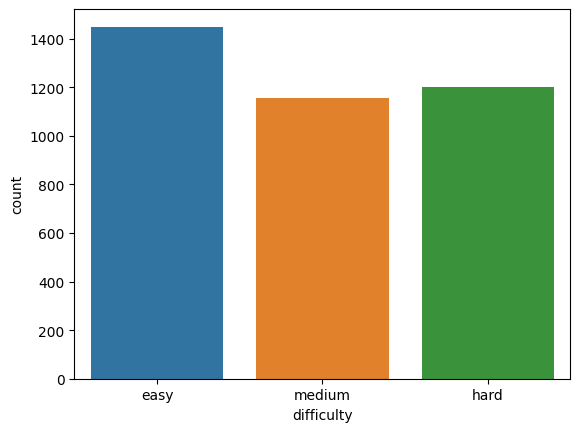

In [336]:
sns.countplot(data = easy_medium_hard_questions,x='difficulty')

In [323]:
easy_medium_hard_questions.to_csv("latest_questions.csv")

In [324]:
## New generation

In [325]:
reply_list=[]
lessonid_list = []
new_df =[]
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"
wrong_question_format_1 = "in the text."
wrong_question_format_2 = "in the next class."

In [326]:
prompt_format = """
         Create one MEDIUM level difficulty multiple choice question with four options 
         and a funny explanation of the answer for a {} year old 
         from this text delimited in triple backticks ```{}```
         and return your reply as a JSON object in this format ```{}```. 
         This question should not be the same as any question in this list delimited in triple backticks ```{}```.
         Do not add any notes, just return only the JSON object.
         Do not create a question that includes ```{}``` and ```{}```.
         Do not create more than one question.
        """

In [327]:
for index in range(len(lessons_merged)):
    try:
        print(index)
        lessonid = lessons_merged.loc[index,'lessonId']
        prompt =prompt_format.format(get_age(index),
                              get_text(index),
                              reply_format,
                              get_old_questions(easy_medium_hard_questions,new_df,lessonid),
                              wrong_question_format_1,
                              wrong_question_format_2)
        reply =get_questions(prompt)
        try:
            reply_list.append(eval(reply.replace("`","")))
            lessonid_list.append(lessonid)
        except Exception as e:
            try:
                questions = reply.replace("`","").split("\n\n")
                reply_list.append(eval(questions[0]))
                lessonid_list.append(lessonid)

                reply_list.append(eval(questions[1]))
                lessonid = lessons_merged.loc[index,'lessonId']
                lessonid_list.append(lessonid)
            except Exception as e:
                process_reply_later.append(reply)
                lessonid_later.append(lessons_merged.loc[index,'lessonId'])
        new_df = pd.DataFrame(reply_list)
        new_df['lessonId'] = lessonid_list
    except Exception as e:
        print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID a1a9fe5d1e77b18fdb9fb1f9ee48b662 in your message.)
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 241aecace6068ea4b99fd0d81e2c2e9a in your message.)
52
53
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 1ce990f239af4aeb3e9231c53e1c6c6a in your message.)
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
Th

682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 4693badd067a748dc45c7ac910463bb2 in your message.)
760
761
762
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID ec43a85f44670e6fe982d19d846d879d in your message.)
763
764
765
766
767
768
769
770
771
772
773
774
775
776
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at hel

In [328]:
new_df

,question,options,answer,explanation,lessonId
0,What is the purpose of a rake on the farm?,"{'a': 'To remove weeds', 'b': 'To cut wood', '...",d,A rake is a farm tool used for gathering leave...,6012bdcecfe09249249f7e9c
1,What is the name of the insect that can fly?,"{'a': 'Butterfly', 'b': 'Spider', 'c': 'Ant', ...",a,Butterflies are insects that have wings which ...,6012bdcecfe09249249f7e9e
2,Which of the following is NOT an example of a ...,"{'a': 'Beetle', 'b': 'Weevil', 'c': 'Butterfly...",c,"Insects that are useful to farmers are bees, b...",6012bdcecfe09249249f7ea0
3,Which of the following is a harmful insect tha...,"{'a': 'Grasshopper', 'b': 'Weevil', 'c': 'Beet...",a,Grasshoppers are like the cows of the insect w...,6012bdcecfe09249249f7ea2
4,What do earthworms do to improve the soil?,"{'a': 'They make the soil wetter', 'b': 'They ...",c,Earthworms are like little farmers. They help ...,6012bdcecfe09249249f7ea4
...,...,...,...,...,...
1254,What method is used to add a new element at th...,"{'a': 'pop()', 'b': 'shift()', 'c': 'push()', ...",c,The push() method is used to add a new element...,62a08a790b99530016d34741
1255,What is a loop in computer programming?,{'a': 'A sequence of instructions that is cont...,a,"In computer programming, a loop is a sequence ...",62a08b540b99530016d3474e
1256,What is hoisting in JavaScript?,{'a': 'The ability to use a variable or functi...,a,Hoisting is the ability to use a variable or f...,62a08d730b99530016d3475b
1257,What is the difference between synchronous and...,{'a': 'Synchronous operations are faster than ...,b,Synchronous operations in JavaScript require o...,62a08ea70b99530016d34768


In [337]:
new_df['difficulty'] = 'medium'

In [338]:
easy_medium_hard_questions = pd.concat([easy_medium_hard_questions,new_df])

In [339]:
easy_medium_hard_questions.to_csv("latest_questions.csv")

<AxesSubplot: xlabel='difficulty', ylabel='count'>

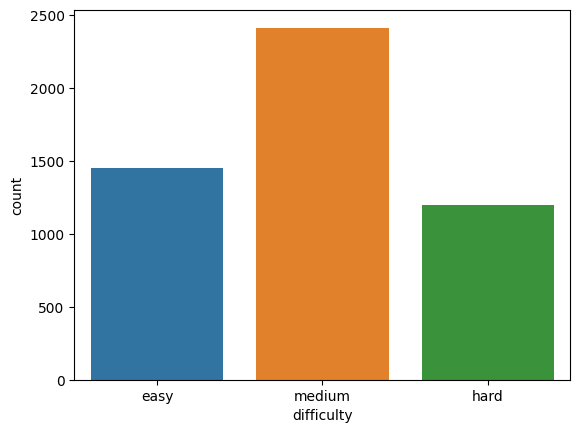

In [340]:
sns.countplot(data = easy_medium_hard_questions,x='difficulty')

In [341]:
reply_list=[]
lessonid_list = []
new_df =[]
reply_format =  "{'question': question,'options':{'a': option 1,'b':option 2,'c':option 3,'d':option 4},'answer': a, 'explantion': simple explanation}"
wrong_question_format_1 = "in the text."
wrong_question_format_2 = "in the next class."

In [342]:
prompt_format = """
         Create one HARD level difficulty multiple choice question with four options 
         and a funny explanation of the answer for a {} year old 
         from this text delimited in triple backticks ```{}```
         and return your reply as a JSON object in this format ```{}```. 
         This question should not be the same as any question in this list delimited in triple backticks ```{}```.
         Do not add any notes, just return only the JSON object.
         Do not create a question that includes ```{}``` and ```{}```.
         Do not create more than one question.
        """

In [343]:
for index in range(len(lessons_merged)):
    try:
        print(index)
        lessonid = lessons_merged.loc[index,'lessonId']
        prompt =prompt_format.format(get_age(index),
                              get_text(index),
                              reply_format,
                              get_old_questions(easy_medium_hard_questions,new_df,lessonid),
                              wrong_question_format_1,
                              wrong_question_format_2)
        reply =get_questions(prompt)
        try:
            reply_list.append(eval(reply.replace("`","")))
            lessonid_list.append(lessonid)
        except Exception as e:
            try:
                questions = reply.replace("`","").split("\n\n")
                reply_list.append(eval(questions[0]))
                lessonid_list.append(lessonid)

                reply_list.append(eval(questions[1]))
                lessonid = lessons_merged.loc[index,'lessonId']
                lessonid_list.append(lessonid)
            except Exception as e:
                process_reply_later.append(reply)
                lessonid_later.append(lessons_merged.loc[index,'lessonId'])
        new_df = pd.DataFrame(reply_list)
        new_df['lessonId'] = lessonid_list
    except Exception as e:
        print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID a130a49a08e505a01533ae2d535a6364 in your message.)
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID e72c6b658493b7676d399d92a788cbd3 in your message.)
148
That model is currentl

920
921
922
923
924
925
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID b51d9ce8901b8ee4f0152a3a78793610 in your message.)
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID e463bcaf901369e4093955eb3d639367 in your message.)
1004
1005
1006
1007
1008
1009
That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.c

In [344]:
new_df

,question,options,answer,explanation,lessonId
0,What is the purpose of a rake on the farm?,"{'a': 'To remove weeds', 'b': 'To make ridges'...",d,A rake is a farm tool used to gather leaves an...,6012bdcecfe09249249f7e9c
1,Which insect is known for its ability to camou...,"{'a': 'Butterfly', 'b': 'Grasshopper', 'c': 'P...",c,The Praying Mantis is known for its ability to...,6012bdcecfe09249249f7e9e
2,Which of the following is NOT an example of a ...,"{'a': 'Beetle', 'b': 'Weevil', 'c': 'Butterfly...",c,Butterflies are useful insects because they he...,6012bdcecfe09249249f7ea0
3,Which of the following harmful farm insects is...,"{'a': 'Weevil', 'b': 'Aphid', 'c': 'Tsetse fly...",c,Tsetse flies are harmful farm insects that can...,6012bdcecfe09249249f7ea2
4,What do earthworms do at night?,"{'a': 'Sleep', 'b': 'Feed and throw off their ...",b,"Earthworms are nocturnal creatures, which mean...",6012bdcecfe09249249f7ea4
...,...,...,...,...,...
1259,What method is used to remove the first elemen...,"{'a': 'pop()', 'b': 'shift()', 'c': 'push()', ...",b,The shift() method removes the first element o...,62a08a790b99530016d34741
1260,What is the difference between a for in loop a...,{'a': 'A for in loop is used to loop through t...,a,A for in loop is used to loop through the prop...,62a08b540b99530016d3474e
1261,What is the result of the following code?\n\nx...,"{'a': 'x = undefined', 'b': 'x = 1', 'c': 'x =...",b,The variable x is declared using var after it ...,62a08d730b99530016d3475b
1262,"What is the purpose of the ""async"" and ""await""...",{'a': 'To make JavaScript synchronous by defau...,d,The 'async' and 'await' clauses in JavaScript ...,62a08ea70b99530016d34768


In [345]:
easy_medium_hard_questions = pd.concat([easy_medium_hard_questions,new_df])
easy_medium_hard_questions.to_csv("latest_questions.csv")

In [346]:
len(easy_medium_hard_questions)

6327

In [ ]:
class_names =['JSS Two','JSS Three','SSS One','SSS Two','SSS Three','JSS One','Afrilearn KidsCode']